## AMLDS Final Project Experiments

In [101]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Imports

In [102]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import networkx as nx
import sklearn
import importlib

# importlib.reload(models)
# importlib.reload(utils)
# importlib.reload(utils.graph_utils)
# importlib.reload(visualization.plot_utils)
# importlib.reload(main)

import models
import utils
import utils.graph_utils
import visualization.plot_utils
import main

from models import DeGrootThresholdModel
from utils import add_random_edges, assign_edge_weights
from utils.graph_utils import create_sbm_graph, create_random_geometric_graph
from visualization.plot_utils import plot_network, plot_posting_heatmap
from main import run_experiment



## Experiment 1: Random Geometric Radius

[0.057 0.058 0.059 0.06  0.061 0.062 0.063 0.064 0.065 0.066 0.067 0.068
 0.069 0.07  0.071 0.072 0.073 0.074 0.075 0.076 0.077 0.078 0.079 0.08
 0.081 0.082 0.083 0.084 0.085 0.086 0.087 0.088 0.089]
Initial opinion distribution:
  Positive opinions: 41.00%
  Negative opinions: 30.00%
  Neutral opinions: 29.00%
  Positive-to-negative ratio: 1.37
  Initial proportion of opinions on positive side: 57.75%
EXPERIMENT STATS:
Total posts: 39044
Positive posts: 34960 (0.90)
Negative posts: 3838 (0.10)
Overall pos/neg ratio: 9.11
Overall proportion of positive posts: 0.90
Variance in proportion of positive posts over time: 0.0053

Final opinion range: 0.2796
Final opinion variance: 0.0030
Final opinion std dev: 0.0547
Final average local agreement: 0.9644
Final local agreement variance: 0.0116


/Users/aratzan/CS/NYU_PhD/AlgMLDS/amlds/models/threshold_degroot.py:210: RuntimeWarning: invalid value encountered in scalar divide
  pos_to_neg_ratio = positive_posts / negative_posts
/Users/aratzan/CS/NYU_PhD/AlgMLDS/amlds/models/threshold_degroot.py:211: RuntimeWarning: invalid value encountered in scalar divide
  proportion_positive = positive_posts / (positive_posts + negative_posts)


Second largest eigenvalue: 0.9978
Initial opinion distribution:
  Positive opinions: 41.00%
  Negative opinions: 30.00%
  Neutral opinions: 29.00%
  Positive-to-negative ratio: 1.37
  Initial proportion of opinions on positive side: 57.75%
EXPERIMENT STATS:
Total posts: 38880
Positive posts: 36961 (0.95)
Negative posts: 1671 (0.04)
Overall pos/neg ratio: 22.12
Overall proportion of positive posts: 0.96
Variance in proportion of positive posts over time: 0.0056

Final opinion range: 0.1997
Final opinion variance: 0.0015
Final opinion std dev: 0.0388
Final average local agreement: 0.9604
Final local agreement variance: 0.0118


/Users/aratzan/CS/NYU_PhD/AlgMLDS/amlds/models/threshold_degroot.py:210: RuntimeWarning: divide by zero encountered in scalar divide
  pos_to_neg_ratio = positive_posts / negative_posts


Second largest eigenvalue: 0.9976
Initial opinion distribution:
  Positive opinions: 41.00%
  Negative opinions: 30.00%
  Neutral opinions: 29.00%
  Positive-to-negative ratio: 1.37
  Initial proportion of opinions on positive side: 57.75%
EXPERIMENT STATS:
Total posts: 39054
Positive posts: 35862 (0.92)
Negative posts: 2931 (0.08)
Overall pos/neg ratio: 12.24
Overall proportion of positive posts: 0.92
Variance in proportion of positive posts over time: 0.0054

Final opinion range: 0.2173
Final opinion variance: 0.0027
Final opinion std dev: 0.0517
Final average local agreement: 0.9742
Final local agreement variance: 0.0083
Second largest eigenvalue: 0.9974
Initial opinion distribution:
  Positive opinions: 41.00%
  Negative opinions: 30.00%
  Neutral opinions: 29.00%
  Positive-to-negative ratio: 1.37
  Initial proportion of opinions on positive side: 57.75%
EXPERIMENT STATS:
Total posts: 38903
Positive posts: 35579 (0.91)
Negative posts: 3071 (0.08)
Overall pos/neg ratio: 11.59
Overa

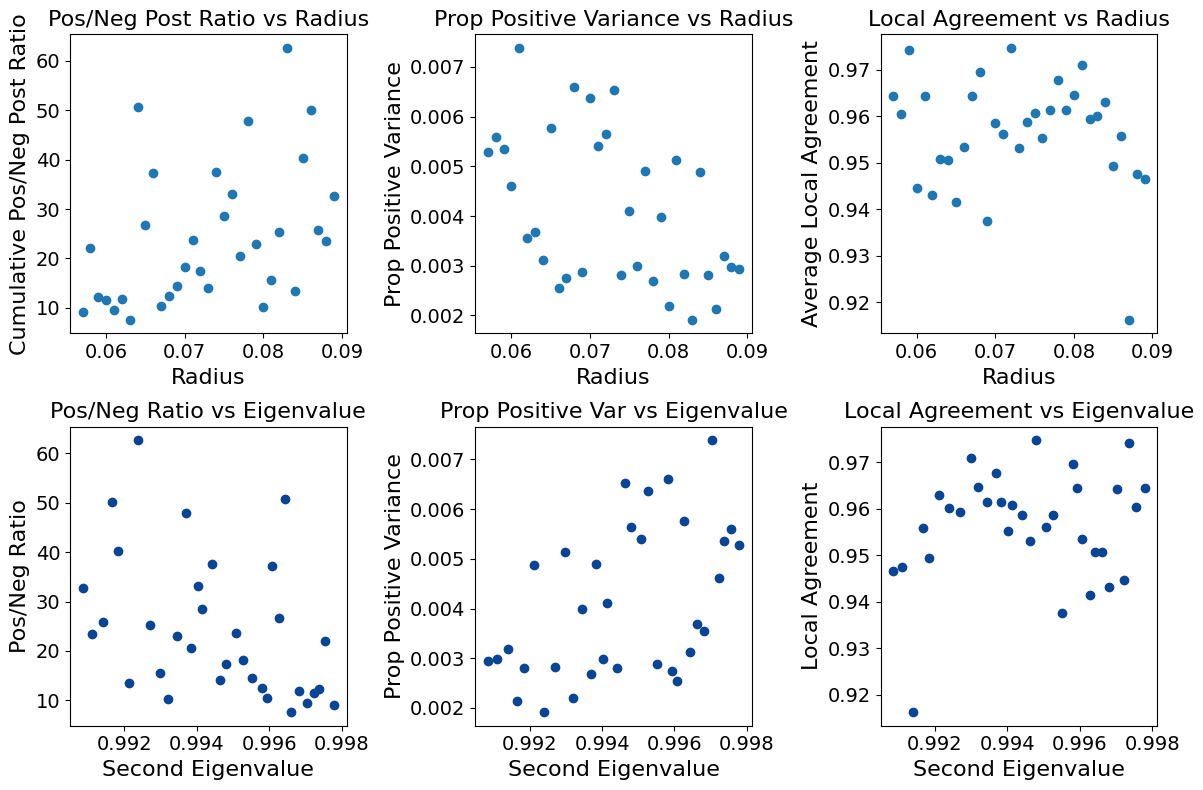

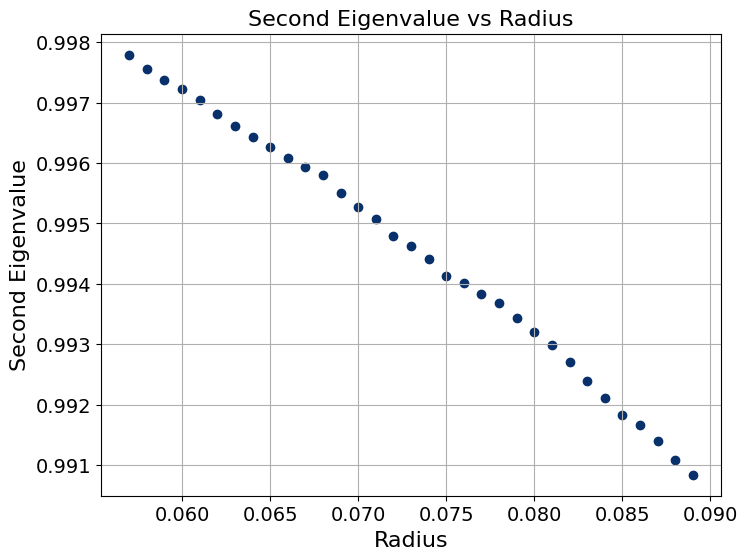

In [103]:
# Create list of radii from 0.1 to 0.06 with steps of 0.01 - the critical radius is around 0.057
radii = np.arange(0.057, 0.09, 0.001)
print(radii) 
# Run experiments for different radii
results = []
for radius in radii:
    G = create_random_geometric_graph(
        n=1000,  # number of nodes 
        radius=radius
    )
    
    # Run experiment with visualization off to avoid clutter
    model, cumulative_pos_to_neg_ratio, proportion_positive_var, average_local_agreement, second_eigenvalue = run_experiment(
        graph=G,
        threshold=0.5,
        steps=40,
        visualize=False
    )
    
    results.append({
        'radius': radius,
        'cumulative_pos_to_neg_ratio': cumulative_pos_to_neg_ratio,
        'proportion_positive_var': proportion_positive_var,
        'local_agreement': average_local_agreement,
        'second_eigenvalue': second_eigenvalue
    })

# Set global font size
fontsize = 16

# Create scatter plots
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2, 3, figsize=(12, 8))

# Plot cumulative positive to negative ratio vs radius
radii_vals = [r['radius'] for r in results]
pos_neg_ratios = [r['cumulative_pos_to_neg_ratio'] for r in results]
ax1.scatter(radii_vals, pos_neg_ratios, color='#1f77b4')  # Light blue
ax1.set_xlabel('Radius', fontsize=fontsize)
ax1.set_ylabel('Cumulative Pos/Neg Post Ratio', fontsize=fontsize)
ax1.set_title('Pos/Neg Post Ratio vs Radius', fontsize=fontsize)
ax1.tick_params(axis='both', labelsize=fontsize-2)

# Plot proportion positive variance vs radius
prop_vars = [r['proportion_positive_var'] for r in results]
ax2.scatter(radii_vals, prop_vars, color='#1f77b4')  # Light blue
ax2.set_xlabel('Radius', fontsize=fontsize)
ax2.set_ylabel('Prop Positive Variance', fontsize=fontsize)
ax2.set_title('Prop Positive Variance vs Radius', fontsize=fontsize)
ax2.tick_params(axis='both', labelsize=fontsize-2)

# Plot local agreement vs radius
agreements = [r['local_agreement'] for r in results]
ax3.scatter(radii_vals, agreements, color='#1f77b4')  # Light blue
ax3.set_xlabel('Radius', fontsize=fontsize)
ax3.set_ylabel('Average Local Agreement', fontsize=fontsize)
ax3.set_title('Local Agreement vs Radius', fontsize=fontsize)
ax3.tick_params(axis='both', labelsize=fontsize-2)

# Plot metrics vs eigenvalue
eigenvals = [r['second_eigenvalue'] for r in results]
ax4.scatter(eigenvals, pos_neg_ratios, color='#084594')  # Medium blue
ax4.set_xlabel('Second Eigenvalue', fontsize=fontsize)
ax4.set_ylabel('Pos/Neg Ratio', fontsize=fontsize)
ax4.set_title('Pos/Neg Ratio vs Eigenvalue', fontsize=fontsize)
ax4.tick_params(axis='both', labelsize=fontsize-2)

ax5.scatter(eigenvals, prop_vars, color='#084594')  # Medium blue
ax5.set_xlabel('Second Eigenvalue', fontsize=fontsize)
ax5.set_ylabel('Prop Positive Variance', fontsize=fontsize)
ax5.set_title('Prop Positive Var vs Eigenvalue', fontsize=fontsize)
ax5.tick_params(axis='both', labelsize=fontsize-2)

ax6.scatter(eigenvals, agreements, color='#084594')  # Medium blue
ax6.set_xlabel('Second Eigenvalue', fontsize=fontsize)
ax6.set_ylabel('Local Agreement', fontsize=fontsize)
ax6.set_title('Local Agreement vs Eigenvalue', fontsize=fontsize)
ax6.tick_params(axis='both', labelsize=fontsize-2)

plt.tight_layout()
plt.show()

# Plot radius vs eigenvalue
plt.figure(figsize=(8, 6))
plt.scatter(radii_vals, eigenvals, color='#08306b')  # Dark blue
plt.xlabel('Radius', fontsize=fontsize)
plt.ylabel('Second Eigenvalue', fontsize=fontsize)
plt.title('Second Eigenvalue vs Radius', fontsize=fontsize)
plt.tick_params(axis='both', labelsize=fontsize-2)
plt.grid(True)
plt.show()


Define best geometric graph

Initial opinion distribution:
  Positive opinions: 41.00%
  Negative opinions: 30.00%
  Neutral opinions: 29.00%
  Positive-to-negative ratio: 1.37
  Initial proportion of opinions on positive side: 57.75%


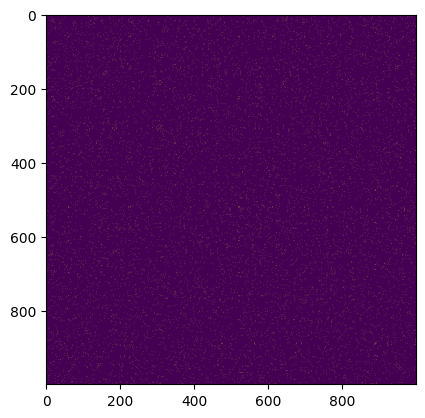

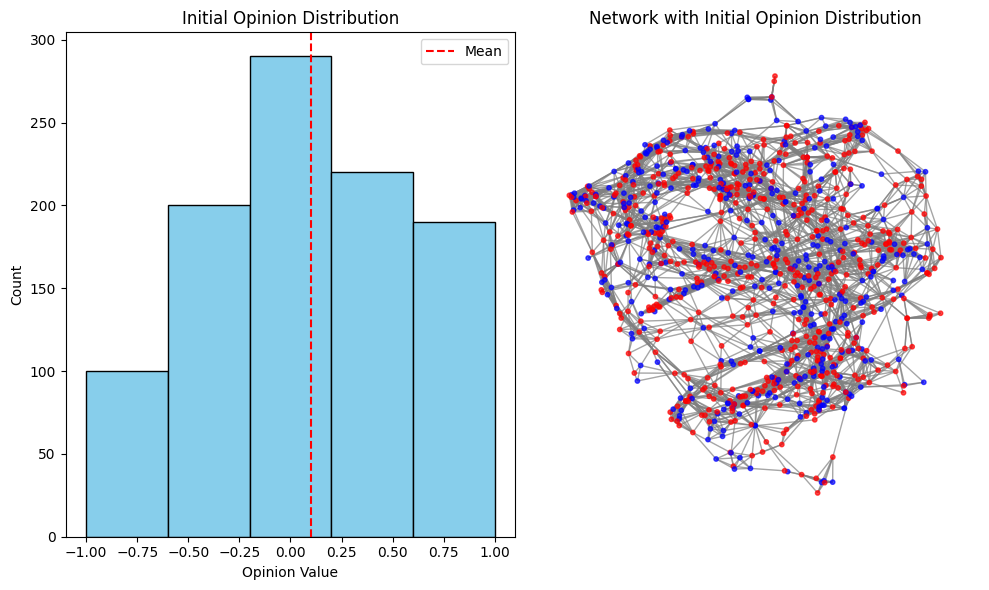

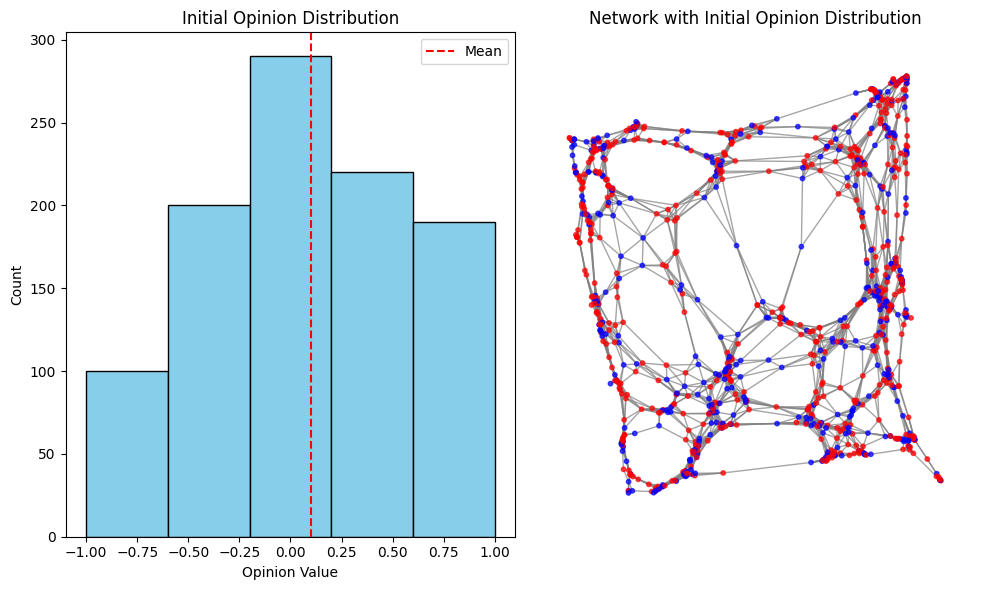

Is the graph connected? True
Are there self loops? False
Initial opinion distribution:
  Positive opinions: 41.00%
  Negative opinions: 30.00%
  Neutral opinions: 29.00%
  Positive-to-negative ratio: 1.37
  Initial proportion of opinions on positive side: 57.75%


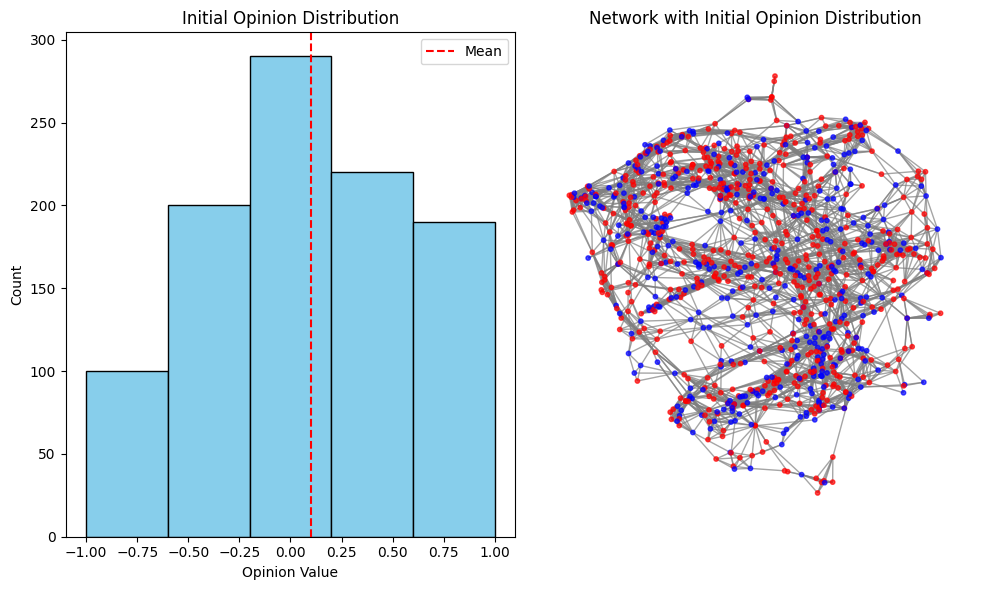

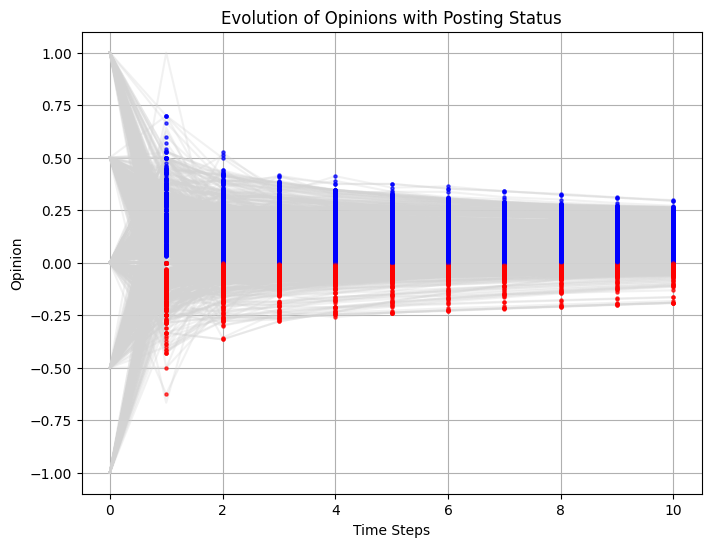

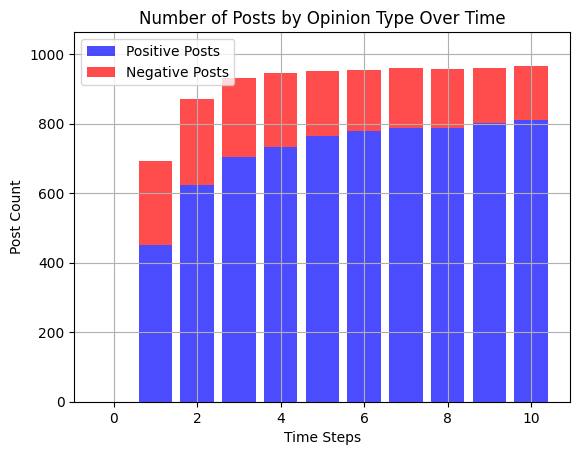

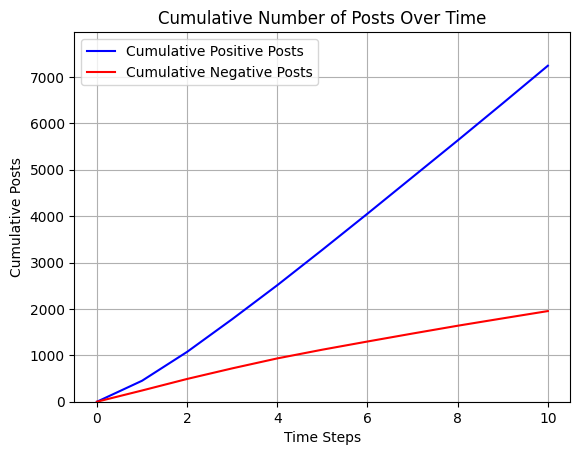

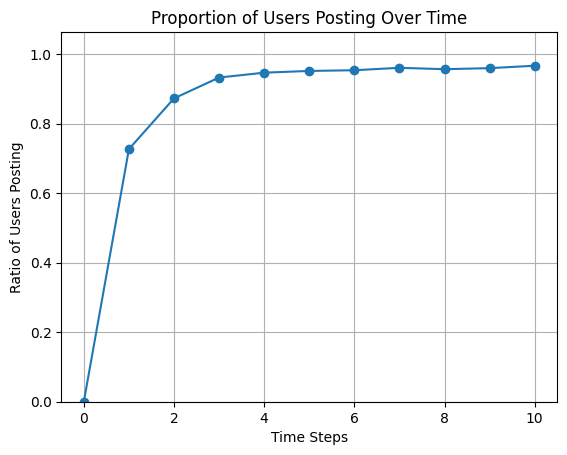

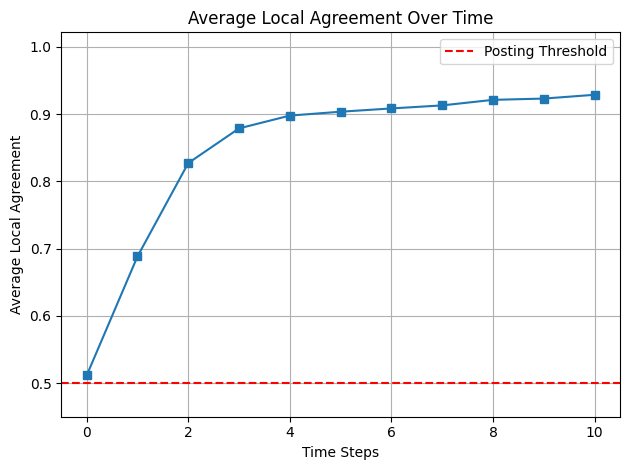

EXPERIMENT STATS:
Total posts: 9730
Positive posts: 7332 (0.75)
Negative posts: 2164 (0.22)
Overall pos/neg ratio: 3.39
Overall proportion of positive posts: 0.77
Variance in proportion of positive posts over time: 0.0037

Final opinion range: 0.4901
Final opinion variance: 0.0076
Final opinion std dev: 0.0871
Final average local agreement: 0.9287
Final local agreement variance: 0.0202
Second largest eigenvalue: 0.9972


In [104]:
G = create_random_geometric_graph(
        n=1000,  # number of nodes
        radius=0.06 # radius for connection
    )
plt.imshow(np.array(nx.adjacency_matrix(G).todense()))

# Some quick visualizations

model = DeGrootThresholdModel(G, local_agreement_threshold=0.6)

ispal_op = [-1, -.5, 0, .5, 1]
ispal_prop = [.1, .2, .29, .22, .19] # target 90/10

model.initialize_opinions_manual(
    initial_opinions=ispal_op,
    proportions=ispal_prop
)

model.visualize_distribution(layout='spring')
model.visualize_distribution(layout='spectral')

# Check if graph is connected - needs to be connected for DeGroot model
is_connected = nx.is_connected(G)
print(f"Is the graph connected? {is_connected}")

if not is_connected:
    # Get number of components
    components = list(nx.connected_components(G))
    print(f"Number of connected components: {len(components)}")
    print(f"Sizes of components: {[len(c) for c in components]}")

# Check for self loops
has_self_loops = nx.number_of_selfloops(G)
print("Are there self loops?", has_self_loops > 0)

# Run experiment with visualization off to avoid clutter
model, cumulative_pos_to_neg_ratio, proportion_positive_var, average_local_agreement, second_eigenvalue = run_experiment(
    graph=G,
    threshold=0.5,
    steps=10,
    visualize=True
)

## Experiment 2: Tuning Expression Threshold with Random Geometric

Initial opinion distribution:
  Positive opinions: 41.00%
  Negative opinions: 30.00%
  Neutral opinions: 29.00%
  Positive-to-negative ratio: 1.37
  Initial proportion of opinions on positive side: 57.75%
EXPERIMENT STATS:
Total posts: 40934
Positive posts: 37086 (0.91)
Negative posts: 3479 (0.08)
Overall pos/neg ratio: 10.66
Overall proportion of positive posts: 0.91
Variance in proportion of positive posts over time: 0.0043

Final opinion range: 0.2087
Final opinion variance: 0.0014
Final opinion std dev: 0.0374
Final average local agreement: 0.9272
Final local agreement variance: 0.0211


/Users/aratzan/CS/NYU_PhD/AlgMLDS/amlds/models/threshold_degroot.py:210: RuntimeWarning: invalid value encountered in scalar divide
  pos_to_neg_ratio = positive_posts / negative_posts
/Users/aratzan/CS/NYU_PhD/AlgMLDS/amlds/models/threshold_degroot.py:211: RuntimeWarning: invalid value encountered in scalar divide
  proportion_positive = positive_posts / (positive_posts + negative_posts)


Second largest eigenvalue: 0.9972
Initial opinion distribution:
  Positive opinions: 41.00%
  Negative opinions: 30.00%
  Neutral opinions: 29.00%
  Positive-to-negative ratio: 1.37
  Initial proportion of opinions on positive side: 57.75%
EXPERIMENT STATS:
Total posts: 40922
Positive posts: 35431 (0.87)
Negative posts: 5136 (0.13)
Overall pos/neg ratio: 6.90
Overall proportion of positive posts: 0.87
Variance in proportion of positive posts over time: 0.0016

Final opinion range: 0.3545
Final opinion variance: 0.0042
Final opinion std dev: 0.0649
Final average local agreement: 0.9832
Final local agreement variance: 0.0054
Second largest eigenvalue: 0.9972
Initial opinion distribution:
  Positive opinions: 41.00%
  Negative opinions: 30.00%
  Neutral opinions: 29.00%
  Positive-to-negative ratio: 1.37
  Initial proportion of opinions on positive side: 57.75%
EXPERIMENT STATS:
Total posts: 40879
Positive posts: 37327 (0.91)
Negative posts: 3200 (0.08)
Overall pos/neg ratio: 11.66
Overal

/Users/aratzan/CS/NYU_PhD/AlgMLDS/amlds/models/threshold_degroot.py:210: RuntimeWarning: divide by zero encountered in scalar divide
  pos_to_neg_ratio = positive_posts / negative_posts


Second largest eigenvalue: 0.9972
Initial opinion distribution:
  Positive opinions: 41.00%
  Negative opinions: 30.00%
  Neutral opinions: 29.00%
  Positive-to-negative ratio: 1.37
  Initial proportion of opinions on positive side: 57.75%
EXPERIMENT STATS:
Total posts: 40787
Positive posts: 37365 (0.92)
Negative posts: 3081 (0.08)
Overall pos/neg ratio: 12.13
Overall proportion of positive posts: 0.92
Variance in proportion of positive posts over time: 0.0057

Final opinion range: 0.1837
Final opinion variance: 0.0022
Final opinion std dev: 0.0466
Final average local agreement: 0.9705
Final local agreement variance: 0.0091
Second largest eigenvalue: 0.9972
Initial opinion distribution:
  Positive opinions: 41.00%
  Negative opinions: 30.00%
  Neutral opinions: 29.00%
  Positive-to-negative ratio: 1.37
  Initial proportion of opinions on positive side: 57.75%
EXPERIMENT STATS:
Total posts: 40741
Positive posts: 38026 (0.93)
Negative posts: 2376 (0.06)
Overall pos/neg ratio: 16.00
Overa

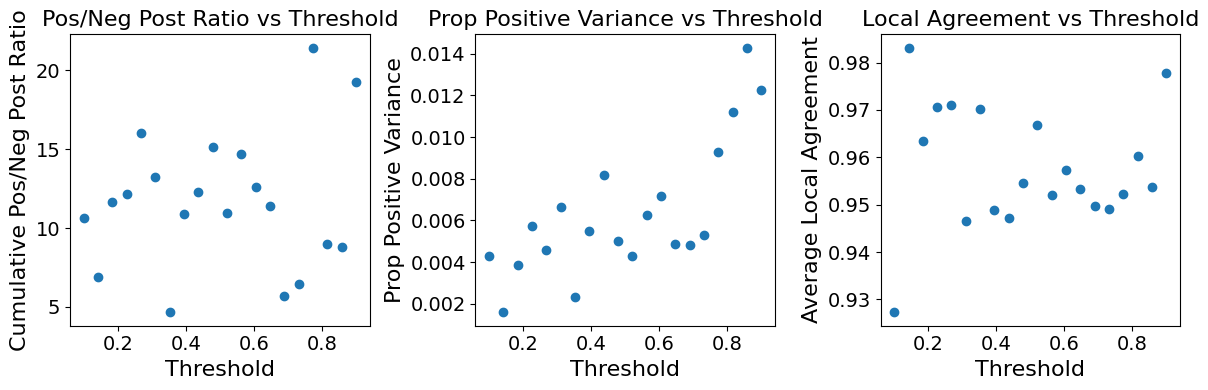

In [105]:
# Run experiments with different thresholds
thresholds = np.linspace(0.1, 0.9, 20)
results = []

for threshold in thresholds:
    model, pos_neg_ratio, prop_var, agreement, eigenval = run_experiment(
        graph=G,
        threshold=threshold,
        steps=40,
        visualize=False
    )
    results.append({
        'threshold': threshold,
        'cumulative_pos_to_neg_ratio': pos_neg_ratio,
        'proportion_positive_var': prop_var,
        'local_agreement': agreement,
        'second_eigenvalue': eigenval
    })

# Set global font size
fontsize = 16
# Create scatter plots
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12, 4))

# Plot metrics vs threshold
thresholds_vals = [r['threshold'] for r in results]
pos_neg_ratios = [r['cumulative_pos_to_neg_ratio'] for r in results]
ax1.scatter(thresholds_vals, pos_neg_ratios)
ax1.set_xlabel('Threshold', fontsize=fontsize)
ax1.set_ylabel('Cumulative Pos/Neg Post Ratio', fontsize=fontsize)
ax1.set_title('Pos/Neg Post Ratio vs Threshold', fontsize=fontsize)
ax1.tick_params(axis='both', labelsize=fontsize-2)

prop_vars = [r['proportion_positive_var'] for r in results]
ax2.scatter(thresholds_vals, prop_vars)
ax2.set_xlabel('Threshold', fontsize=fontsize)
ax2.set_ylabel('Prop Positive Variance', fontsize=fontsize)
ax2.set_title('Prop Positive Variance vs Threshold', fontsize=fontsize)
ax2.tick_params(axis='both', labelsize=fontsize-2)

agreements = [r['local_agreement'] for r in results]
ax3.scatter(thresholds_vals, agreements)
ax3.set_xlabel('Threshold', fontsize=fontsize)
ax3.set_ylabel('Average Local Agreement', fontsize=fontsize)
ax3.set_title('Local Agreement vs Threshold', fontsize=fontsize)
ax3.tick_params(axis='both', labelsize=fontsize-2)

plt.tight_layout()
plt.show()

Initial opinion distribution:
  Positive opinions: 41.00%
  Negative opinions: 30.00%
  Neutral opinions: 29.00%
  Positive-to-negative ratio: 1.37
  Initial proportion of opinions on positive side: 57.75%


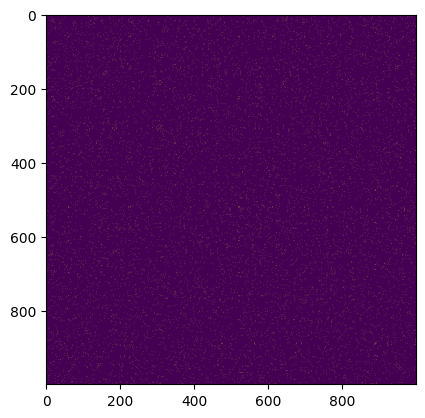

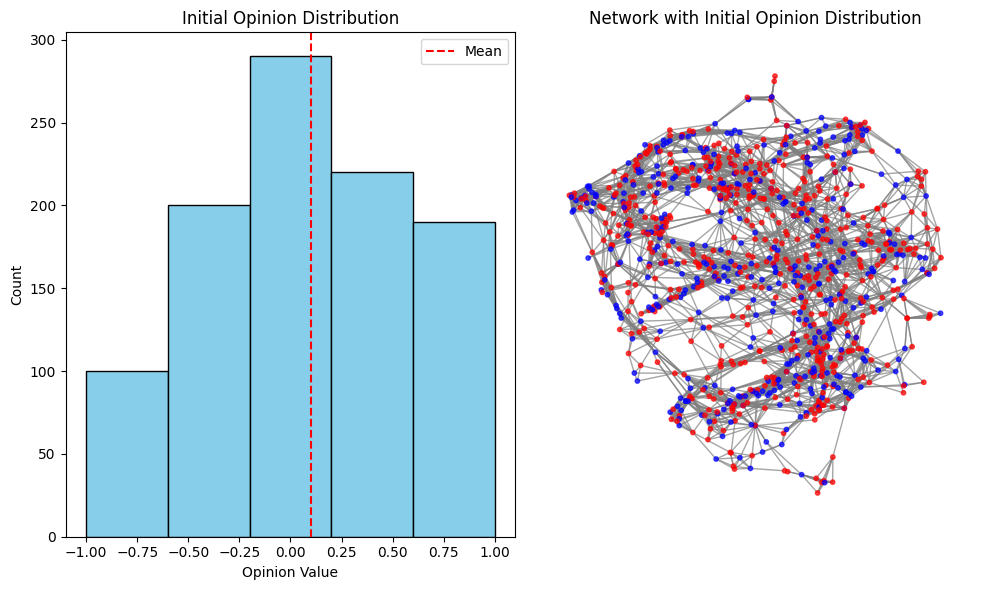

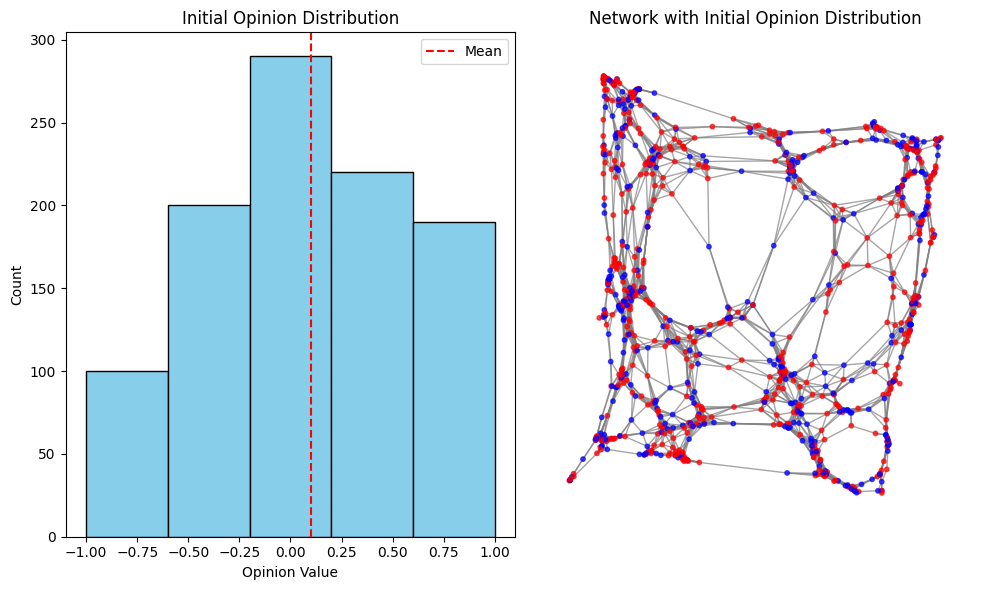

Is the graph connected? True
Are there self loops? False
Initial opinion distribution:
  Positive opinions: 41.00%
  Negative opinions: 30.00%
  Neutral opinions: 29.00%
  Positive-to-negative ratio: 1.37
  Initial proportion of opinions on positive side: 57.75%
EXPERIMENT STATS:
Total posts: 38107
Positive posts: 36411 (0.96)
Negative posts: 1479 (0.04)
Overall pos/neg ratio: 24.62
Overall proportion of positive posts: 0.96
Variance in proportion of positive posts over time: 0.0056

Final opinion range: 0.1225
Final opinion variance: 0.0008
Final opinion std dev: 0.0276
Final average local agreement: 0.9482
Final local agreement variance: 0.0171
Second largest eigenvalue: 0.9972


/Users/aratzan/CS/NYU_PhD/AlgMLDS/amlds/models/threshold_degroot.py:210: RuntimeWarning: invalid value encountered in scalar divide
  pos_to_neg_ratio = positive_posts / negative_posts
/Users/aratzan/CS/NYU_PhD/AlgMLDS/amlds/models/threshold_degroot.py:211: RuntimeWarning: invalid value encountered in scalar divide
  proportion_positive = positive_posts / (positive_posts + negative_posts)
/Users/aratzan/CS/NYU_PhD/AlgMLDS/amlds/models/threshold_degroot.py:210: RuntimeWarning: divide by zero encountered in scalar divide
  pos_to_neg_ratio = positive_posts / negative_posts


In [113]:
G = create_random_geometric_graph(
        n=1000,  # number of nodes
        radius=0.06 # radius for connection
    )
plt.imshow(np.array(nx.adjacency_matrix(G).todense()))

# Some quick visualizations

model = DeGrootThresholdModel(G, local_agreement_threshold=0.6)

ispal_op = [-1, -.5, 0, .5, 1]
ispal_prop = [.1, .2, .29, .22, .19] # target 90/10

model.initialize_opinions_manual(
    initial_opinions=ispal_op,
    proportions=ispal_prop
)

model.visualize_distribution(layout='spring')
model.visualize_distribution(layout='spectral')

# Check if graph is connected - needs to be connected for DeGroot model
is_connected = nx.is_connected(G)
print(f"Is the graph connected? {is_connected}")

if not is_connected:
    # Get number of components
    components = list(nx.connected_components(G))
    print(f"Number of connected components: {len(components)}")
    print(f"Sizes of components: {[len(c) for c in components]}")

# Check for self loops
has_self_loops = nx.number_of_selfloops(G)
print("Are there self loops?", has_self_loops > 0)

# Run experiment with visualization off to avoid clutter
model, cumulative_pos_to_neg_ratio, proportion_positive_var, average_local_agreement, second_eigenvalue = run_experiment(
    graph=G,
    threshold=0.55,
    steps=40,
    visualize=False
)

## Experiment 3: Intra and Inter 5-Block SBM

Initial opinion distribution:
  Positive opinions: 41.00%
  Negative opinions: 30.00%
  Neutral opinions: 29.00%
  Positive-to-negative ratio: 1.37
  Initial proportion of opinions on positive side: 57.75%
EXPERIMENT STATS:
Total posts: 29823
Positive posts: 29331 (0.98)
Negative posts: 281 (0.01)
Overall pos/neg ratio: 104.38
Overall proportion of positive posts: 0.99
Variance in proportion of positive posts over time: 0.0016

Final opinion range: 0.0000
Final opinion variance: 0.0000
Final opinion std dev: 0.0000
Final average local agreement: 0.6970
Final local agreement variance: 0.0197
Second largest eigenvalue: 0.5505
Initial opinion distribution:
  Positive opinions: 41.00%
  Negative opinions: 30.00%
  Neutral opinions: 29.00%
  Positive-to-negative ratio: 1.37
  Initial proportion of opinions on positive side: 57.75%
EXPERIMENT STATS:
Total posts: 29148
Positive posts: 28668 (0.98)
Negative posts: 281 (0.01)
Overall pos/neg ratio: 102.02
Overall proportion of positive posts: 0

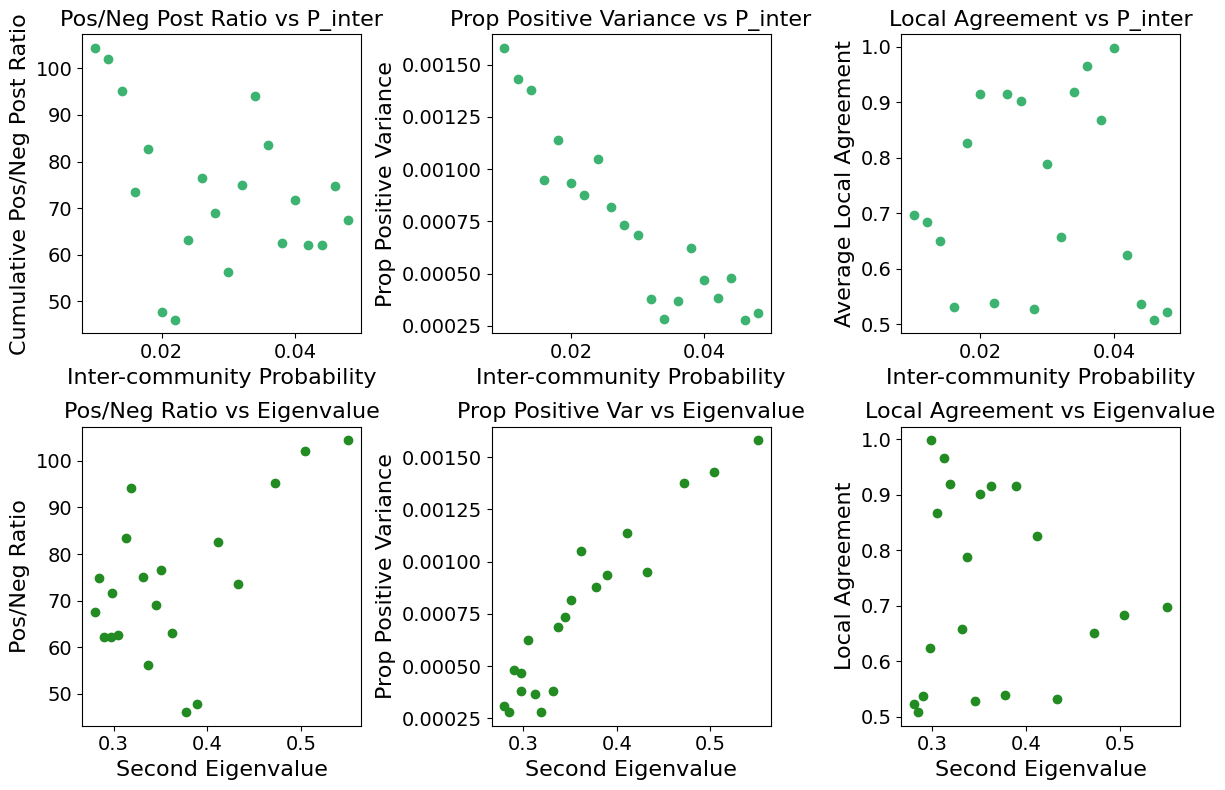

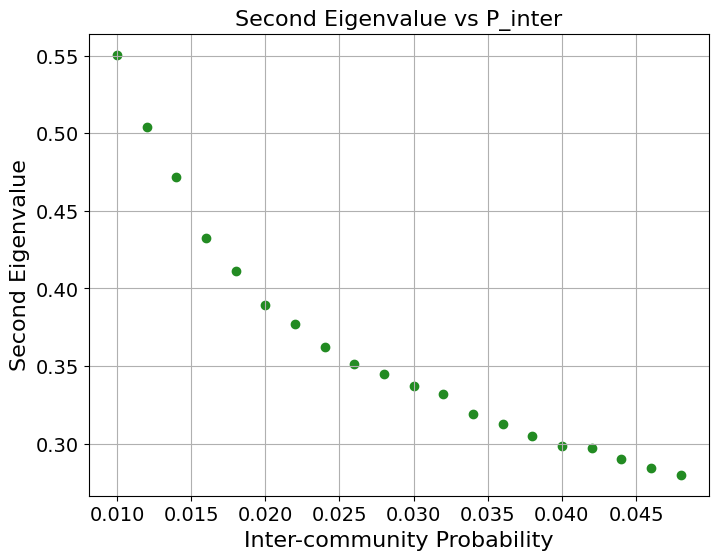

In [106]:
# Create list of inter-community probabilities from 0.01 to 0.05
p_inters = np.arange(0.01, .05, 0.002)

# Run experiments for different inter-community probabilities
results = []
for p_inter in p_inters:
    G = create_sbm_graph(
        sizes=[200, 200, 200, 200, 200],  # 5 equal-sized communities
        p_intra=0.05,                      # fixed intra-community probability
        p_inter=p_inter                    # varying inter-community probability
    )
    
    # Run experiment with visualization off to avoid clutter
    model, cumulative_pos_to_neg_ratio, proportion_positive_var, average_local_agreement, second_eigenvalue = run_experiment(
        graph=G,
        threshold=0.55,
        steps=40,
        visualize=False
    )
    
    results.append({
        'p_inter': p_inter,
        'cumulative_pos_to_neg_ratio': cumulative_pos_to_neg_ratio,
        'proportion_positive_var': proportion_positive_var,
        'local_agreement': average_local_agreement,
        'second_eigenvalue': second_eigenvalue
    })

# Create scatter plots
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2, 3, figsize=(12, 8))

# Plot cumulative positive to negative ratio vs p_inter
p_inter_vals = [r['p_inter'] for r in results]
pos_neg_ratios = [r['cumulative_pos_to_neg_ratio'] for r in results]
ax1.scatter(p_inter_vals, pos_neg_ratios, color='#3CB371')  # Medium sea green
ax1.set_xlabel('Inter-community Probability', fontsize=fontsize)
ax1.set_ylabel('Cumulative Pos/Neg Post Ratio', fontsize=fontsize)
ax1.set_title('Pos/Neg Post Ratio vs P_inter', fontsize=fontsize)
ax1.tick_params(axis='both', labelsize=fontsize-2)

# Plot proportion positive variance vs p_inter
prop_vars = [r['proportion_positive_var'] for r in results]
ax2.scatter(p_inter_vals, prop_vars, color='#3CB371')  # Medium sea green
ax2.set_xlabel('Inter-community Probability', fontsize=fontsize)
ax2.set_ylabel('Prop Positive Variance', fontsize=fontsize)
ax2.set_title('Prop Positive Variance vs P_inter', fontsize=fontsize)
ax2.tick_params(axis='both', labelsize=fontsize-2)

# Plot local agreement vs p_inter
agreements = [r['local_agreement'] for r in results]
ax3.scatter(p_inter_vals, agreements, color='#3CB371')  # Medium sea green
ax3.set_xlabel('Inter-community Probability', fontsize=fontsize)
ax3.set_ylabel('Average Local Agreement', fontsize=fontsize)
ax3.set_title('Local Agreement vs P_inter', fontsize=fontsize)
ax3.tick_params(axis='both', labelsize=fontsize-2)

# Plot metrics vs eigenvalue
eigenvals = [r['second_eigenvalue'] for r in results]
ax4.scatter(eigenvals, pos_neg_ratios, color='#228B22')  # Forest green
ax4.set_xlabel('Second Eigenvalue', fontsize=fontsize)
ax4.set_ylabel('Pos/Neg Ratio', fontsize=fontsize)
ax4.set_title('Pos/Neg Ratio vs Eigenvalue', fontsize=fontsize)
ax4.tick_params(axis='both', labelsize=fontsize-2)

ax5.scatter(eigenvals, prop_vars, color='#228B22')  # Forest green
ax5.set_xlabel('Second Eigenvalue', fontsize=fontsize)
ax5.set_ylabel('Prop Positive Variance', fontsize=fontsize)
ax5.set_title('Prop Positive Var vs Eigenvalue', fontsize=fontsize)
ax5.tick_params(axis='both', labelsize=fontsize-2)

ax6.scatter(eigenvals, agreements, color='#228B22')  # Forest green
ax6.set_xlabel('Second Eigenvalue', fontsize=fontsize)
ax6.set_ylabel('Local Agreement', fontsize=fontsize)
ax6.set_title('Local Agreement vs Eigenvalue', fontsize=fontsize)
ax6.tick_params(axis='both', labelsize=fontsize-2)

plt.tight_layout()
plt.show()

# Plot p_inter vs eigenvalue
plt.figure(figsize=(8, 6))
plt.scatter(p_inter_vals, eigenvals, color='#228B22')  # Forest green
plt.xlabel('Inter-community Probability', fontsize=fontsize)
plt.ylabel('Second Eigenvalue', fontsize=fontsize)
plt.title('Second Eigenvalue vs P_inter', fontsize=fontsize)
plt.tick_params(axis='both', labelsize=fontsize-2)
plt.grid(True)
plt.show()


Initial opinion distribution:
  Positive opinions: 41.00%
  Negative opinions: 30.00%
  Neutral opinions: 29.00%
  Positive-to-negative ratio: 1.37
  Initial proportion of opinions on positive side: 57.75%
EXPERIMENT STATS:
Total posts: 19087
Positive posts: 18588 (0.97)
Negative posts: 301 (0.02)
Overall pos/neg ratio: 61.75
Overall proportion of positive posts: 0.98
Variance in proportion of positive posts over time: 0.0022

Final opinion range: 0.0000
Final opinion variance: 0.0000
Final opinion std dev: 0.0000
Final average local agreement: 0.5157
Final local agreement variance: 0.0411
Second largest eigenvalue: 0.4396
Initial opinion distribution:
  Positive opinions: 41.00%
  Negative opinions: 30.00%
  Neutral opinions: 29.00%
  Positive-to-negative ratio: 1.37
  Initial proportion of opinions on positive side: 57.75%
EXPERIMENT STATS:
Total posts: 12914
Positive posts: 12450 (0.96)
Negative posts: 270 (0.02)
Overall pos/neg ratio: 46.11
Overall proportion of positive posts: 0.9

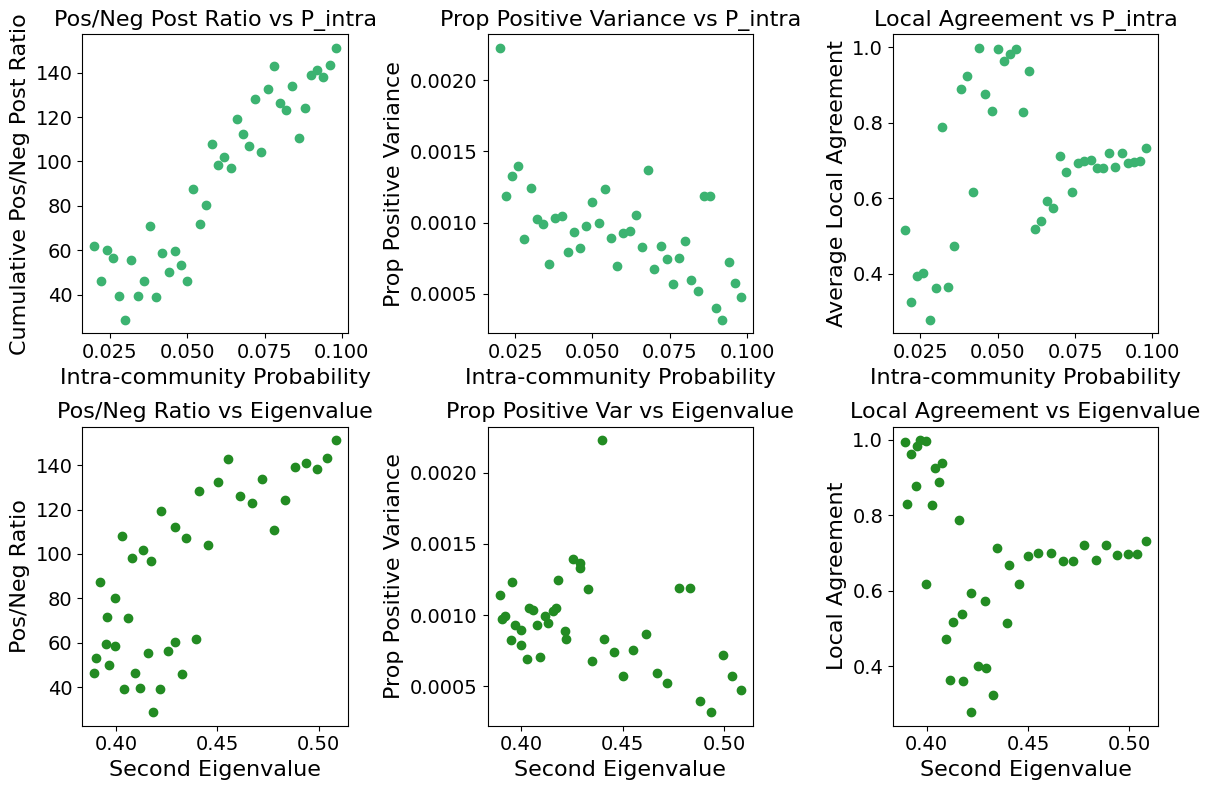

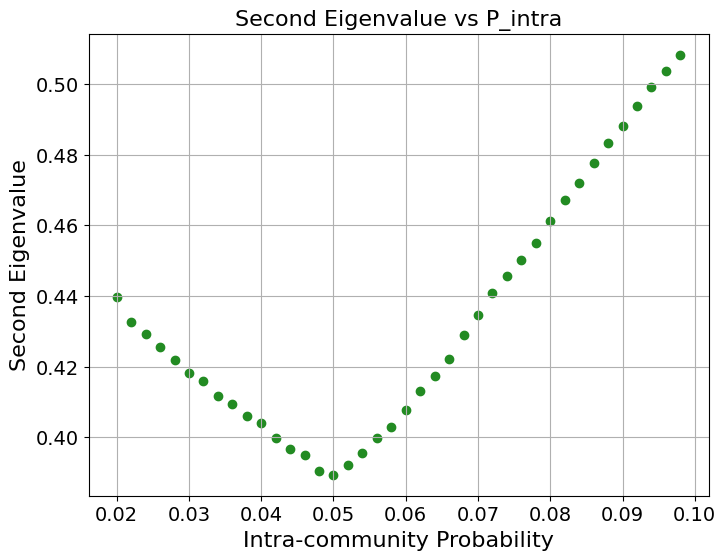

In [107]:
# Create list of intra-community probabilities from 0.1 to 0.5
p_intras = np.arange(0.02, 0.1, 0.002)

# Run experiments for different intra-community probabilities
results = []
for p_intra in p_intras:
    G = create_sbm_graph(
        sizes=[200, 200, 200, 200, 200],  # 5 equal-sized communities
        p_intra=p_intra,                  # varying intra-community probability
        p_inter=0.02                      # fixed inter-community probability
    )
    
    # Run experiment with visualization off to avoid clutter
    model, pos_to_neg_ratio, prop_pos_var, avg_local_agreement, second_eigenval = run_experiment(
        graph=G,
        threshold=0.55,
        steps=40,
        visualize=False
    )
    
    results.append({
        'p_intra': p_intra,
        'pos_to_neg_ratio': pos_to_neg_ratio,
        'proportion_positive_var': prop_pos_var,
        'local_agreement': avg_local_agreement,
        'second_eigenvalue': second_eigenval
    })
# Create scatter plots
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2, 3, figsize=(12, 8))

# Plot metrics vs p_intra
p_intra_vals = [r['p_intra'] for r in results]
pos_neg_ratios = [r['pos_to_neg_ratio'] for r in results]
prop_vars = [r['proportion_positive_var'] for r in results]
agreements = [r['local_agreement'] for r in results]
eigenvals = [r['second_eigenvalue'] for r in results]

ax1.scatter(p_intra_vals, pos_neg_ratios, color='#3CB371')  # Forest green
ax1.set_xlabel('Intra-community Probability', fontsize=fontsize)
ax1.set_ylabel('Cumulative Pos/Neg Post Ratio', fontsize=fontsize)
ax1.set_title('Pos/Neg Post Ratio vs P_intra', fontsize=fontsize)
ax1.tick_params(axis='both', labelsize=fontsize-2)

ax2.scatter(p_intra_vals, prop_vars, color='#3CB371')  # Forest green
ax2.set_xlabel('Intra-community Probability', fontsize=fontsize)
ax2.set_ylabel('Prop Positive Variance', fontsize=fontsize)
ax2.set_title('Prop Positive Variance vs P_intra', fontsize=fontsize)
ax2.tick_params(axis='both', labelsize=fontsize-2)

ax3.scatter(p_intra_vals, agreements, color='#3CB371')  # Forest green
ax3.set_xlabel('Intra-community Probability', fontsize=fontsize)
ax3.set_ylabel('Average Local Agreement', fontsize=fontsize)
ax3.set_title('Local Agreement vs P_intra', fontsize=fontsize)
ax3.tick_params(axis='both', labelsize=fontsize-2)

# Plot metrics vs eigenvalue
ax4.scatter(eigenvals, pos_neg_ratios, color='#228B22')  # Forest green
ax4.set_xlabel('Second Eigenvalue', fontsize=fontsize)
ax4.set_ylabel('Pos/Neg Ratio', fontsize=fontsize)
ax4.set_title('Pos/Neg Ratio vs Eigenvalue', fontsize=fontsize)
ax4.tick_params(axis='both', labelsize=fontsize-2)

ax5.scatter(eigenvals, prop_vars, color='#228B22')  # Forest green
ax5.set_xlabel('Second Eigenvalue', fontsize=fontsize)
ax5.set_ylabel('Prop Positive Variance', fontsize=fontsize)
ax5.set_title('Prop Positive Var vs Eigenvalue', fontsize=fontsize)
ax5.tick_params(axis='both', labelsize=fontsize-2)

ax6.scatter(eigenvals, agreements, color='#228B22')  # Forest green
ax6.set_xlabel('Second Eigenvalue', fontsize=fontsize)
ax6.set_ylabel('Local Agreement', fontsize=fontsize)
ax6.set_title('Local Agreement vs Eigenvalue', fontsize=fontsize)
ax6.tick_params(axis='both', labelsize=fontsize-2)

plt.tight_layout()
plt.show()

# Plot p_intra vs eigenvalue
plt.figure(figsize=(8, 6))
plt.scatter(p_intra_vals, eigenvals, color='#228B22')  # Forest green
plt.xlabel('Intra-community Probability', fontsize=fontsize)
plt.ylabel('Second Eigenvalue', fontsize=fontsize)
plt.title('Second Eigenvalue vs P_intra', fontsize=fontsize)
plt.tick_params(axis='both', labelsize=fontsize-2)
plt.grid(True)
plt.show()


Initial opinion distribution:
  Positive opinions: 41.00%
  Negative opinions: 30.00%
  Neutral opinions: 29.00%
  Positive-to-negative ratio: 1.37
  Initial proportion of opinions on positive side: 57.75%


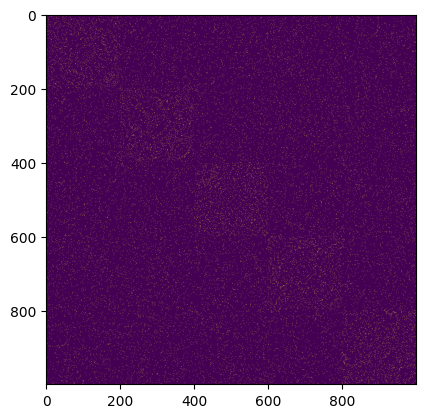

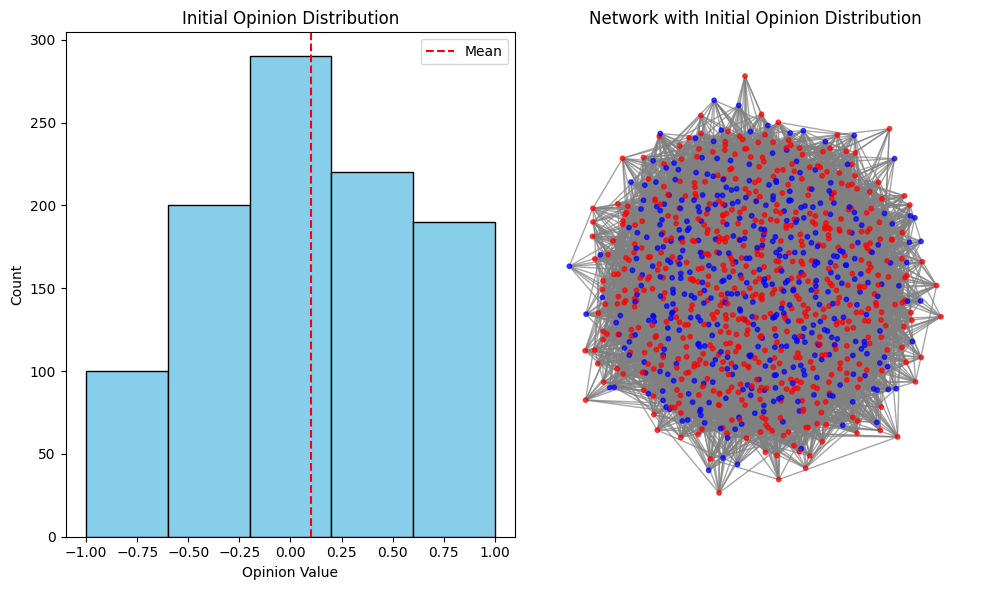

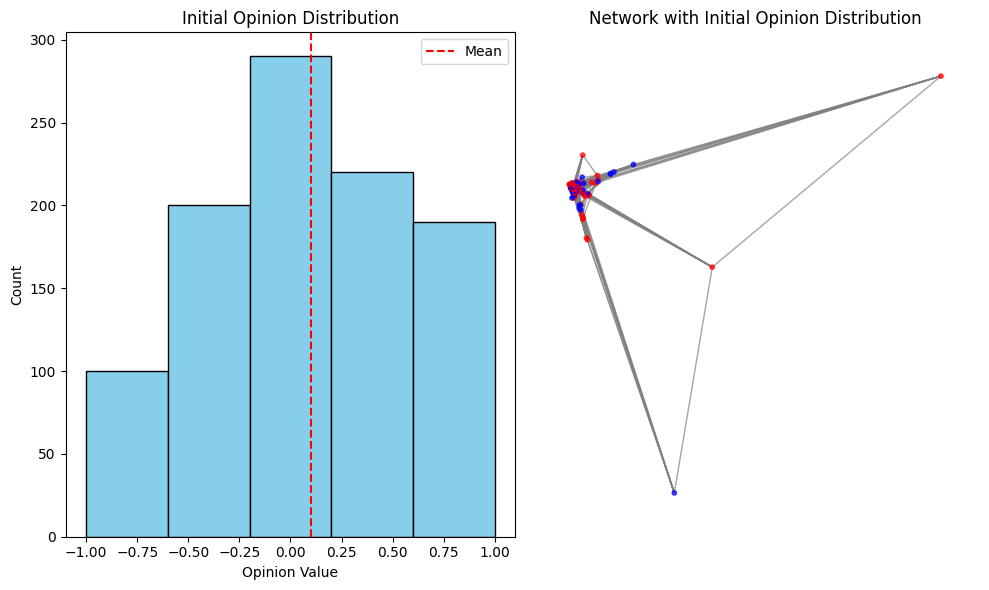

Is the graph connected? True
Are there self loops? False
Initial opinion distribution:
  Positive opinions: 41.00%
  Negative opinions: 30.00%
  Neutral opinions: 29.00%
  Positive-to-negative ratio: 1.37
  Initial proportion of opinions on positive side: 57.75%
EXPERIMENT STATS:
Total posts: 13196
Positive posts: 12739 (0.97)
Negative posts: 254 (0.02)
Overall pos/neg ratio: 50.15
Overall proportion of positive posts: 0.98
Variance in proportion of positive posts over time: 0.0010

Final opinion range: 0.0000
Final opinion variance: 0.0000
Final opinion std dev: 0.0000
Final average local agreement: 0.8577
Final local agreement variance: 0.0583
Second largest eigenvalue: 0.4040


In [108]:
G = create_sbm_graph(
    sizes=[200, 200, 200, 200, 200],  # 5 equal-sized communities
    p_intra=0.04,                  # varying intra-community probability
    p_inter=0.02                      # fixed inter-community probability
)
plt.imshow(np.array(nx.adjacency_matrix(G).todense()))

# Some quick visualizations

model = DeGrootThresholdModel(G, local_agreement_threshold=0.55)

ispal_op = [-1, -.5, 0, .5, 1]
ispal_prop = [.1, .2, .29, .22, .19] # target 90/10

model.initialize_opinions_manual(
    initial_opinions=ispal_op,
    proportions=ispal_prop
)

model.visualize_distribution(layout='spring')
model.visualize_distribution(layout='spectral')

# Check if graph is connected - needs to be connected for DeGroot model
is_connected = nx.is_connected(G)
print(f"Is the graph connected? {is_connected}")

if not is_connected:
    # Get number of components
    components = list(nx.connected_components(G))
    print(f"Number of connected components: {len(components)}")
    print(f"Sizes of components: {[len(c) for c in components]}")

# Check for self loops
has_self_loops = nx.number_of_selfloops(G)
print("Are there self loops?", has_self_loops > 0)

# Run experiment with visualization off to avoid clutter
model, cumulative_pos_to_neg_ratio, proportion_positive_var, average_local_agreement, second_eigenvalue = run_experiment(
    graph=G,
    threshold=0.55,
    steps=40,
    visualize=False
)

## Experiment 4. Biased SBM

Initial opinion distribution:
  Positive opinions: 41.00%
  Negative opinions: 30.00%
  Neutral opinions: 29.00%
  Positive-to-negative ratio: 1.37
  Initial proportion of opinions on positive side: 57.75%
EXPERIMENT STATS:
Total posts: 13990
Positive posts: 13274 (0.95)
Negative posts: 321 (0.02)
Overall pos/neg ratio: 41.35
Overall proportion of positive posts: 0.98
Variance in proportion of positive posts over time: 0.0017

Final opinion range: 0.0000
Final opinion variance: 0.0000
Final opinion std dev: 0.0000
Final average local agreement: 0.5738
Final local agreement variance: 0.0853
Second largest eigenvalue: 0.4040
Initial opinion distribution:
  Positive opinions: 41.00%
  Negative opinions: 30.00%
  Neutral opinions: 29.00%
  Positive-to-negative ratio: 1.37
  Initial proportion of opinions on positive side: 57.75%
EXPERIMENT STATS:
Total posts: 13772
Positive posts: 13069 (0.95)
Negative posts: 319 (0.02)
Overall pos/neg ratio: 40.97
Overall proportion of positive posts: 0.9

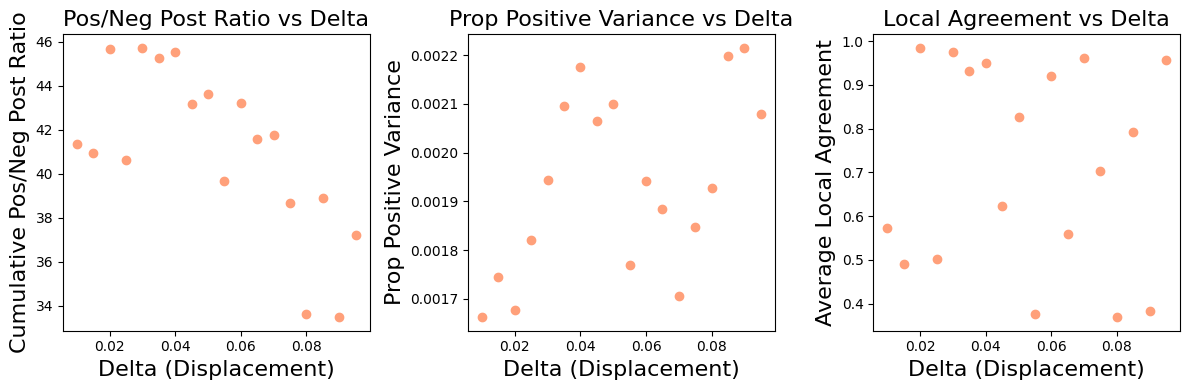

In [110]:
# Create list of delta values to test
deltas = np.arange(0.01, np.min(ispal_prop), 0.005)

# Run experiments for different delta values
results = []
for delta in deltas:
    # Create graph with 5 communities as normal
    G = create_sbm_graph(
        sizes=[200, 200, 200, 200, 200],  # 5 communities of equal size
        p_intra=0.04,                      # probability within communities
        p_inter=0.02                      # probability between communities
    )
    
    # Run experiment with visualization off to avoid clutter
    _, pos_to_neg_ratio, prop_pos_var, avg_local_agreement, second_eigenval = run_experiment(
        graph=G,
        threshold=0.55,
        steps=40,
        visualize=False, 
        delta=delta
    )
    
    results.append({
        'delta': delta,
        'pos_to_neg_ratio': pos_to_neg_ratio,
        'proportion_positive_var': prop_pos_var,
        'local_agreement': avg_local_agreement,
        'second_eigenvalue': second_eigenval
    })

# Create scatter plots
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12, 4))

# Plot metrics vs delta
delta_vals = [r['delta'] for r in results]
pos_neg_ratios = [r['pos_to_neg_ratio'] for r in results]
prop_vars = [r['proportion_positive_var'] for r in results]
agreements = [r['local_agreement'] for r in results]
# Use a soft orange colormap
orange_color = '#FFA07A'  # Light salmon orange

ax1.scatter(delta_vals, pos_neg_ratios, color=orange_color)
ax1.set_xlabel('Delta (Displacement)', fontsize=fontsize)
ax1.set_ylabel('Cumulative Pos/Neg Post Ratio', fontsize=fontsize)
ax1.set_title('Pos/Neg Post Ratio vs Delta', fontsize=fontsize)

ax2.scatter(delta_vals, prop_vars, color=orange_color)
ax2.set_xlabel('Delta (Displacement)', fontsize=fontsize)
ax2.set_ylabel('Prop Positive Variance', fontsize=fontsize)
ax2.set_title('Prop Positive Variance vs Delta', fontsize=fontsize)

ax3.scatter(delta_vals, agreements, color=orange_color)
ax3.set_xlabel('Delta (Displacement)', fontsize=fontsize)
ax3.set_ylabel('Average Local Agreement', fontsize=fontsize)
ax3.set_title('Local Agreement vs Delta', fontsize=fontsize)

plt.tight_layout()
plt.show()


In [111]:
G = create_sbm_graph(
    sizes=[200, 200, 200, 200, 200],  # 5 communities of equal size
    p_intra=0.04,                      # probability within communities
    p_inter=0.02                      # probability between communities
)

# Run experiment with visualization off to avoid clutter
_, pos_to_neg_ratio, prop_pos_var, avg_local_agreement, second_eigenval = run_experiment(
    graph=G,
    threshold=0.55,
    steps=40,
    visualize=False, 
    delta=0.09
)

Initial opinion distribution:
  Positive opinions: 41.00%
  Negative opinions: 30.00%
  Neutral opinions: 29.00%
  Positive-to-negative ratio: 1.37
  Initial proportion of opinions on positive side: 57.75%
EXPERIMENT STATS:
Total posts: 12646
Positive posts: 11935 (0.94)
Negative posts: 321 (0.03)
Overall pos/neg ratio: 37.18
Overall proportion of positive posts: 0.97
Variance in proportion of positive posts over time: 0.0021

Final opinion range: 0.0000
Final opinion variance: 0.0000
Final opinion std dev: 0.0000
Final average local agreement: 0.6199
Final local agreement variance: 0.0684
Second largest eigenvalue: 0.4040


## Experiment 5: Comparison to Influencer Graph 
(See Influencer Model Notebook)

In [115]:
ispal_prop

[0.1, 0.2, 0.29, 0.22, 0.19]

In [114]:
V

array([[0.2 , 0.1 , 0.29, 0.22, 0.19],
       [0.1 , 0.3 , 0.19, 0.22, 0.19],
       [0.1 , 0.2 , 0.39, 0.12, 0.19],
       [0.1 , 0.2 , 0.29, 0.32, 0.09],
       [0.  , 0.2 , 0.29, 0.22, 0.29]])

## Cross network comparison